In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math
from tabulate import tabulate
from scipy.stats import randint

pd.set_option('display.max_columns', 50)

In [ ]:
def f(X):
    x1,x2 = X
    return 2*pow(x1,2) - 2*x1*x2 +pow(x2,2)

def gradF(x):
    x1,x2 = x
    return np.array([4*x1 - 2*x2, -2*x1 + 2*x2])

def hessF(x):
    return np.array([[4,-2],[-2,2]])

X=[ np.array([3,5]) ]
alphas = []
grads = []
errs = []
# gradient descent: x(n+1) = x(n) + α ∇f, For Cauchy steep desc. α = argmin f(x(n) + α ∇f)

# for Quadratic function α = argmin f(x(n) + α ∇f(x(n))) => α = - (∇f.T ∇f)/(∇f H ∇f)
# proof : https://ocw.mit.edu/courses/sloan-school-of-management/15-084j-nonlinear-programming-spring-2004/lecture-notes/lec5_steep_desce.pdf

n_iters = 6
for i in range(n_iters):
    gradf_ = gradF(X[-1])
    
    hessf_ = hessF(X[-1])
    # α = (S.T S)/(S.T H S)
    alpha = -1*np.matmul(gradf_.T, gradf_)/(np.matmul(np.matmul(gradf_.T,hessf_),gradf_))
    # Or solve equations usign Scipy. 
    
    X.append(X[-1] + alpha*gradf_)
    
    alphas.append(alpha)
    grads.append(gradf_)
    errs.append(pow(np.linalg.norm(X[-1]-X[-2]),2))
    print("-----Iteration",i+1,"-----")
    print("alpha =",round(alpha,3))
    print("x1 = ",round(X[-1][0],4),", x2 = " ,round(X[-1][1],4),sep="")
    print("error :",round(errs[-1],7))
    print("\n")

y_vals = [f(x) for x in X]

In [ ]:
import math
pi = math.pi

P_list, y_list, A_list, r_list, h_list = [],[],[],[],[]
Penalty= [0,1,10,50,100,200,500, 1000, 10000, 100000, 1000000]

for P in Penalty:
  a, b = 0.5, 1   #range for radius
  c, d = 1,2  #range for height

  count = 0
  state = True

  while state:
    count += 1
    I = b-a
    J = d-c
    r1 = a + I*0.618   #golden search
    h1 = c + J*0.618

    r2 = b - I*0.618
    h2 = d - J*0.618

    if count == 1 :
      h= (c+d)/2
    
    #for radius
    y1 = 2*pi*r1**2 + 2*pi*r1*h + P*(pi*r1**2*h-4.5)**2    
    y2 = 2*pi*r2**2 + 2*pi*r2*h + P*(pi*r2**2*h-4.5)**2

    if y1 > y2:
      b=r1
      r=r1
    else:
      a=r2
      r=r2

    #for height
    y3 = 2*pi*r**2 + 2*pi*r*h1 + P*(pi*r**2*h1-4.5)**2
    y4 = 2*pi*r**2 + 2*pi*r*h2 + P*(pi*r**2*h2-4.5)**2

    if y3 > y4:
      d = h1
      h = h1
    else:
      c = h2
      h = h2

    if count >1000:
      state = False 

  A = 2*pi*r**2 +2*pi*r*h
  y = 2*pi*r**2 + 2*pi*r*h + P*(pi*r**2*h - 4.5)**2


  P_list.append(P)
  y_list.append(y)
  A_list.append(A)
  r_list.append(r)
  h_list.append(h)


In [ ]:
from tabulate import tabulate

table = zip(P_list, y_list, A_list, r_list, h_list,)
headers=['Penalty', 'Y+', 'A+', 'r+', 'h+']

print(tabulate(table, headers=headers, floatfmt=".4f"))

  Penalty       Y+       A+      r+      h+
---------  -------  -------  ------  ------
        0   4.7124   4.7124  0.5000  1.0000
        1  13.7313  12.1418  0.8369  1.4721
       10  14.9695  14.8403  0.9059  1.7013
       50  15.0639  15.0388  0.8914  1.7938
      100  15.0764  15.0638  0.8940  1.7878
      200  15.0826  15.0764  0.8943  1.7887
      500  15.0864  15.0839  0.8947  1.7886
     1000  15.0876  15.0864  0.8946  1.7893
    10000  15.0887  15.0886  0.8947  1.7895
   100000  15.0888  15.0888  0.8947  1.7894
  1000000  15.0889  15.0889  0.8947  1.7894


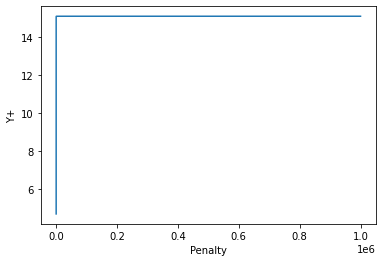

In [ ]:
from math import log
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)
# naming the X axis and Y axis
plt.xlabel('Penalty')
plt.ylabel('Y+')

# plot the data
ax.plot(P_list,y_list)
plt.show()

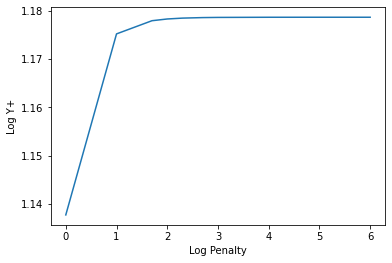

In [ ]:
from math import log
P_list = [log(y,10) for y in P_list[1:]]
y_list = [log(y,10) for y in y_list[1:]]


import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)
# naming the X axis and Y axis
plt.xlabel('Log Penalty')
plt.ylabel('Log Y+')

# plot the data
ax.plot(P_list,y_list)
plt.show()